Explaination of CNN is in the video link below

https://www.youtube.com/watch?v=zfiSAzpy9NM&list=PLeo1K3hjS3uu7CxAacxVndI4bE_o3BDtO&index=23

Concolution Neural Network

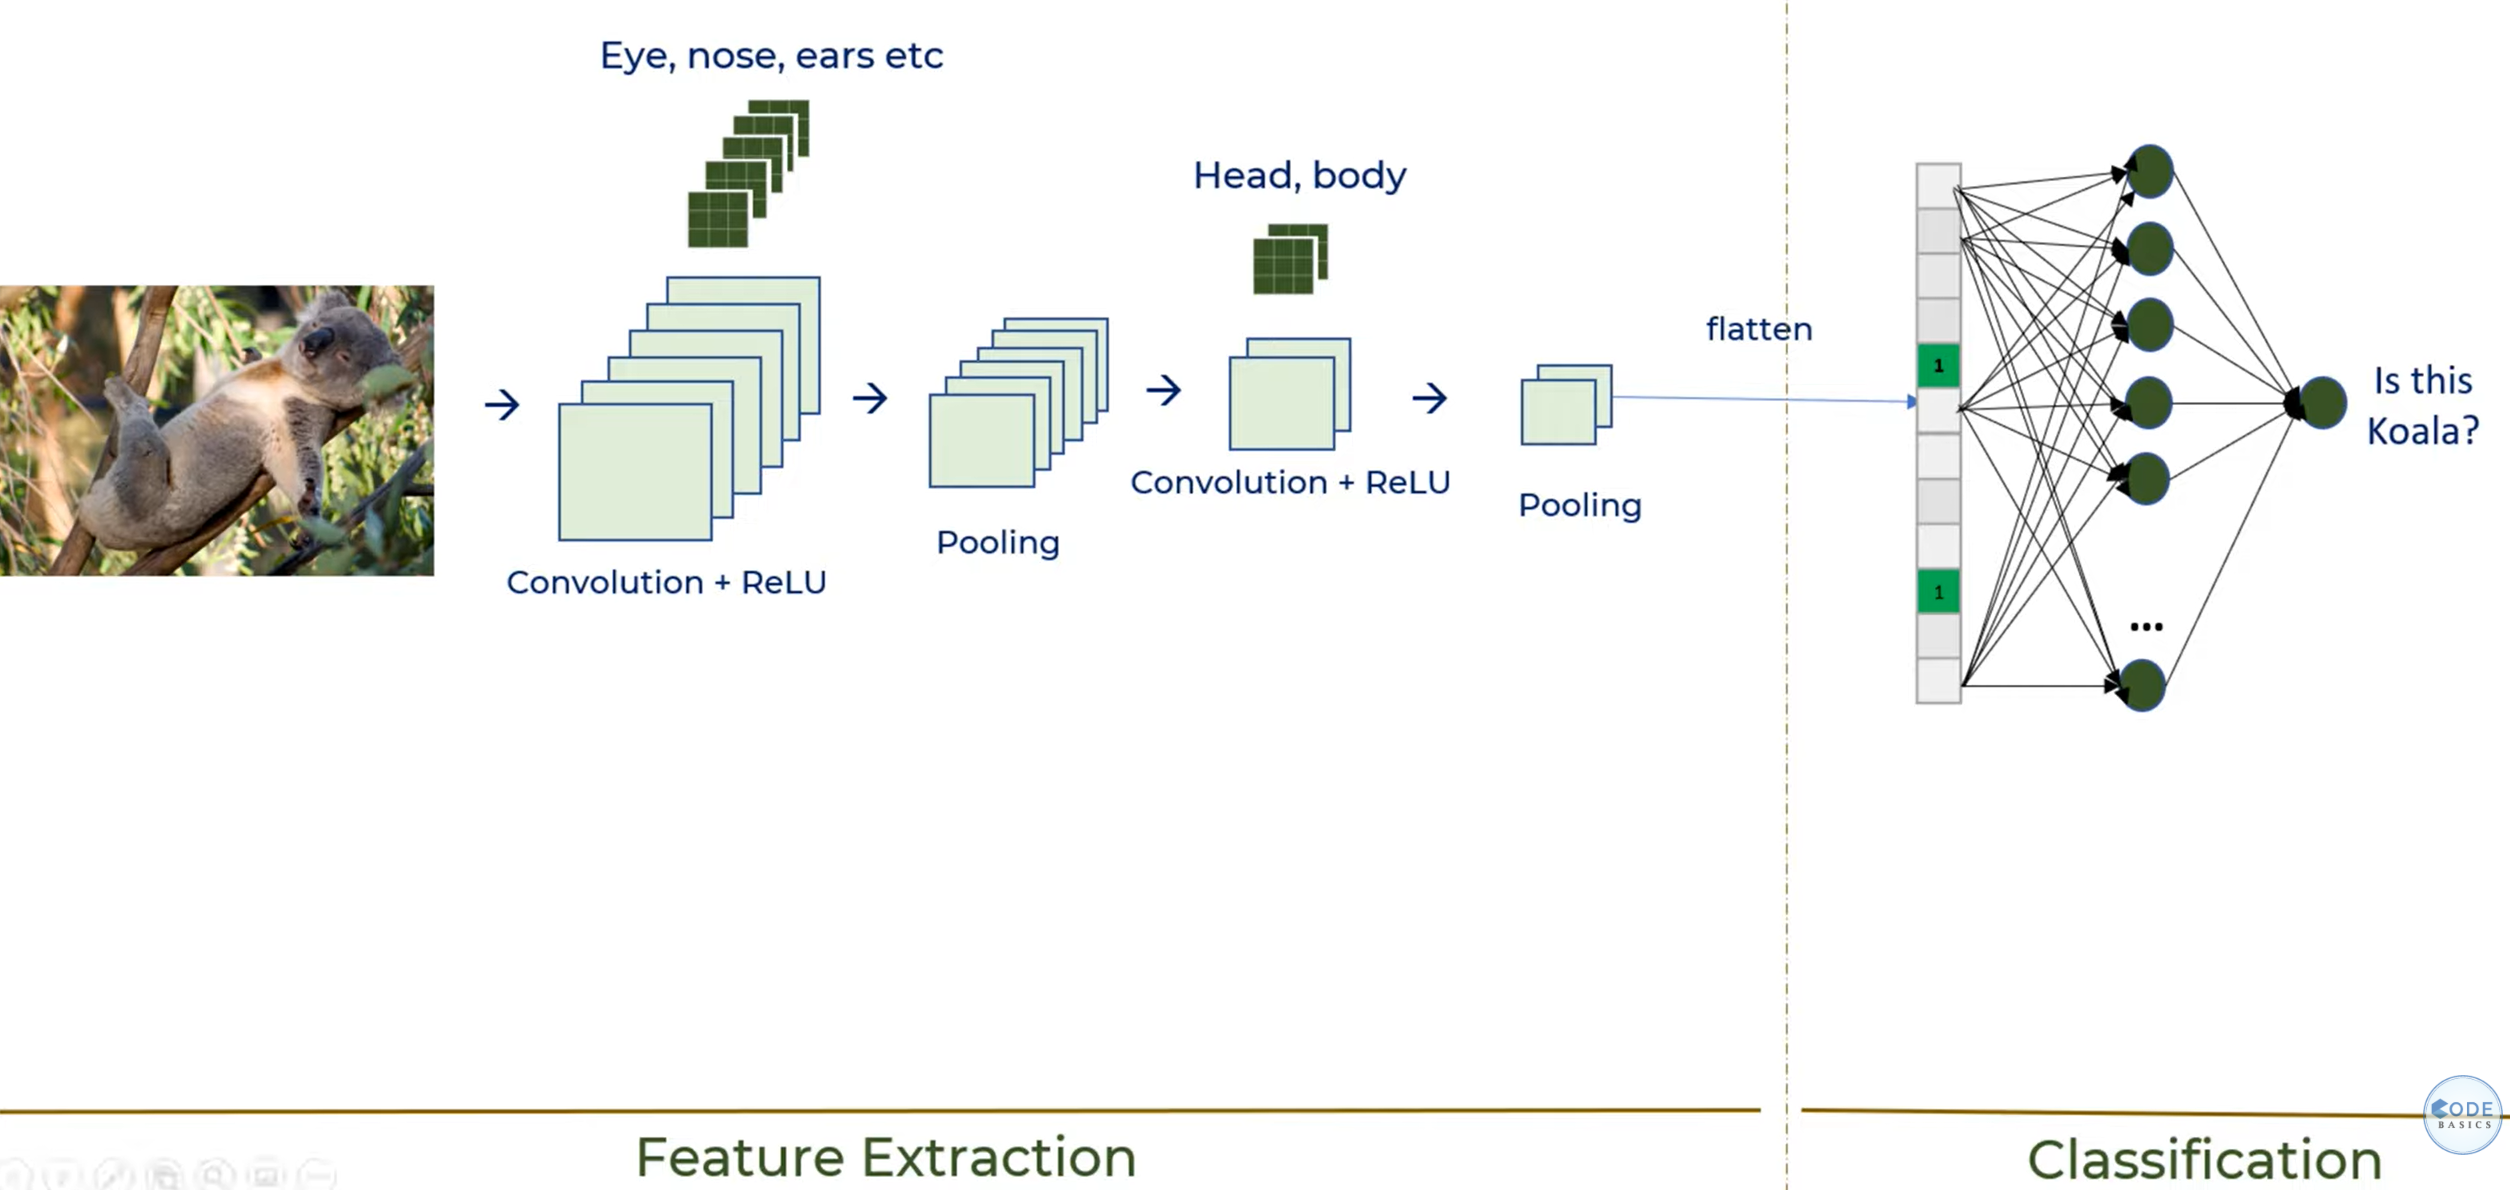

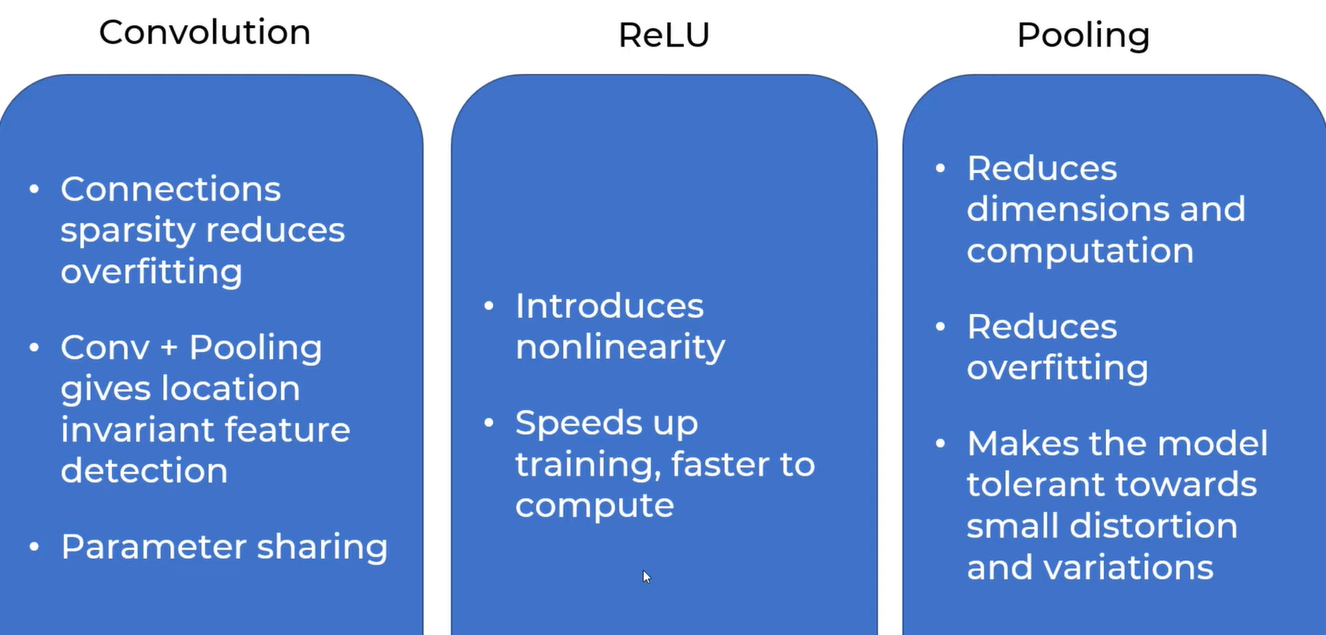

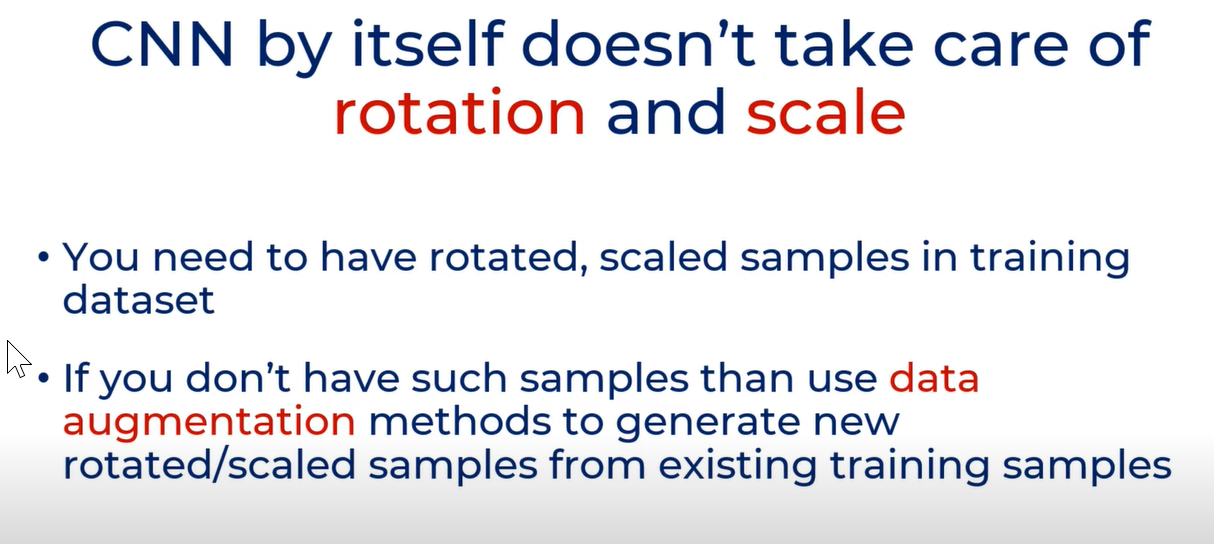

**Small Image Classification Using Convolutional Neural Network (CNN)**

In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification

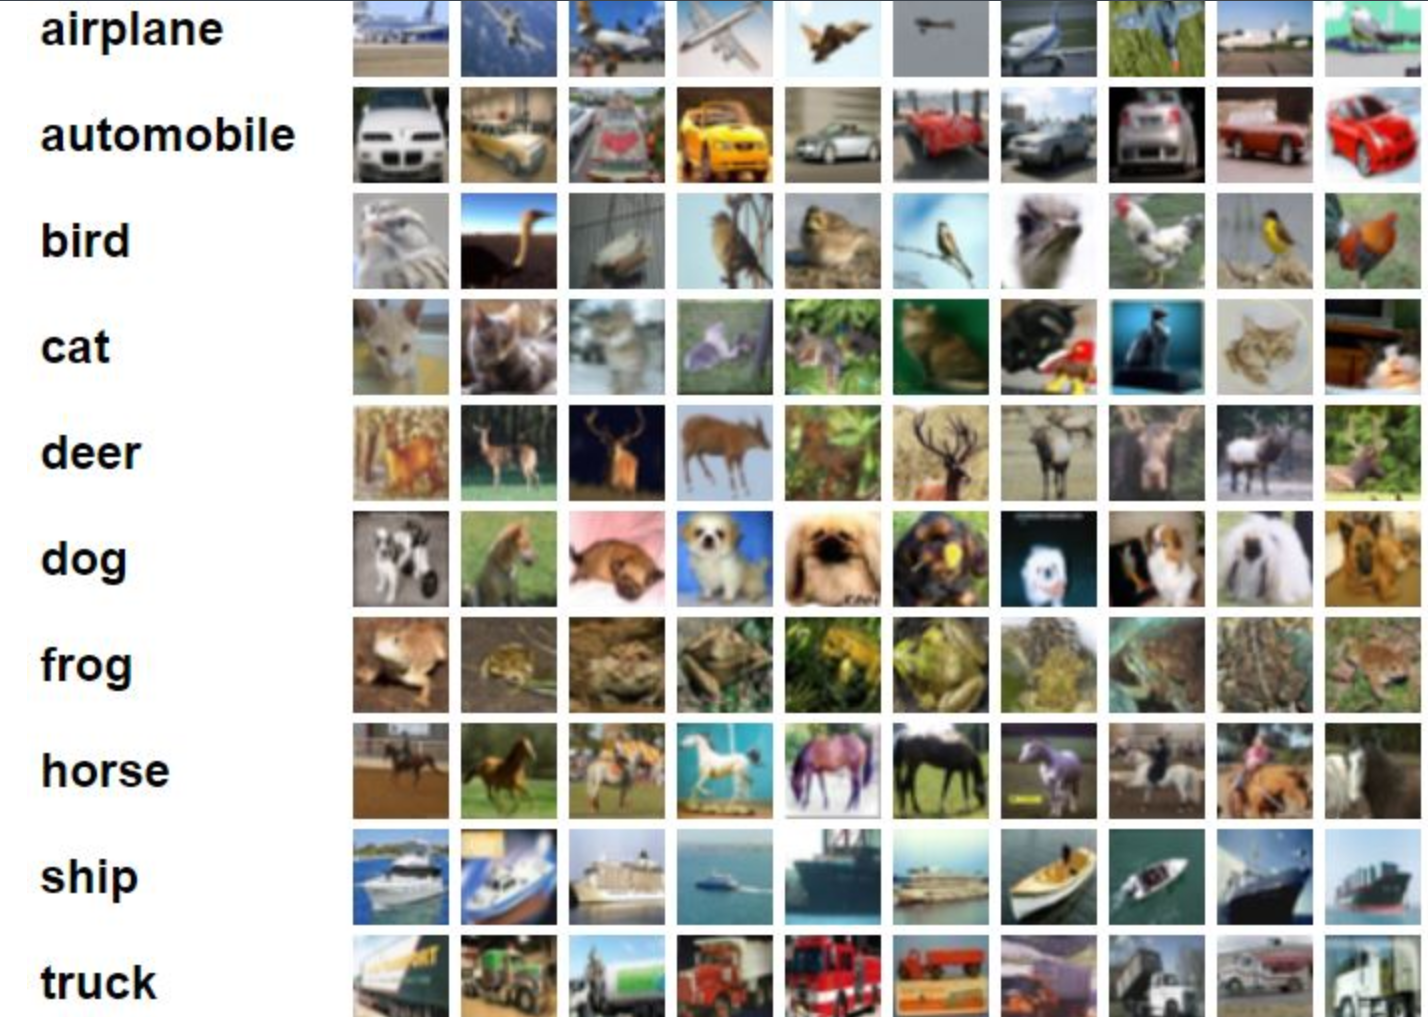

In [47]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

Load the dataset

In [48]:
(X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data()

In [49]:
X_train.shape

(50000, 32, 32, 3)

In [50]:
X_test.shape

(10000, 32, 32, 3)

In [51]:
Y_train.shape

(50000, 1)

In [52]:
Y_test.shape

(10000, 1)

Here we see there are 50000 training images and 10000 test images

In [53]:
Y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

Y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [54]:
Y_train = Y_train.reshape(-1,)
Y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [55]:
Y_test = Y_test.reshape(-1,)

In [56]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

plot some images to see what they are

In [57]:
def plot_sample(X,Y,index):
    plt.figure(figsize=(10,2))
    plt.imshow(X[index])
    plt.xlabel(classes[Y[index]])

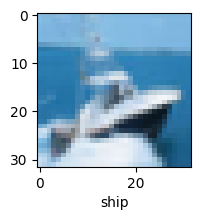

In [58]:
plot_sample(X_train,Y_train,8)

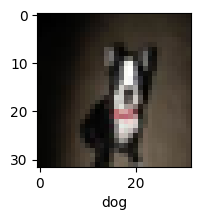

In [59]:
plot_sample(X_train,Y_train,198)

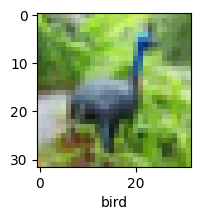

In [60]:
plot_sample(X_train,Y_train,6)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255



Normalize the training and test data

In [61]:
X_train = X_train/255
X_test = X_test/255

Build simple artificial neural network for image classification

In [70]:
ann = keras.Sequential([
    layers.Flatten(input_shape= (32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='softmax'),
])

ann.compile(optimizer = 'SGD',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

ann.fit(X_train,Y_train,epochs=5)

C:\Users\ebrah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.3078 - loss: 1.9319
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.4172 - loss: 1.6484
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 30ms/step - accuracy: 0.4592 - loss: 1.5447
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.4803 - loss: 1.4854
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.4918 - loss: 1.4423


You can see that at the end of 5 epochs, accuracy is at around 49%

In [71]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
Y_pred = ann.predict(X_test)
Y_pred_classes = [np.argmax(element) for element in Y_pred]

print("Classification Report: \n", classification_report(Y_test, Y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.57      0.49      0.53      1000
           1       0.38      0.84      0.52      1000
           2       0.44      0.24      0.32      1000
           3       0.41      0.24      0.31      1000
           4       0.44      0.36      0.40      1000
           5       0.44      0.34      0.39      1000
           6       0.44      0.68      0.53      1000
           7       0.69      0.41      0.52      1000
           8       0.49      0.72      0.58      1000
           9       0.55      0.32      0.40      1000

    accuracy                           0.46     10000
   macro avg       0.49      0.46      0.45     10000
weighted avg       0.49      0.46      0.45     10000



Now let us build a convolutional neural network to train our images

In [73]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [74]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [76]:
cnn.fit(X_train, Y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6111 - loss: 1.1092
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.6672 - loss: 0.9556
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7037 - loss: 0.8628
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7322 - loss: 0.7773
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7516 - loss: 0.7166


With CNN, at the end 5 epochs, accuracy is at around 75% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [78]:
cnn.evaluate(X_test,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6765 - loss: 0.9608


[0.9787217974662781, 0.6754000186920166]

In [79]:
Y_pred = cnn.predict(X_test)
Y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


array([[5.3277554e-04, 7.9286787e-05, 7.3696841e-03, 8.8359249e-01,
        5.5680732e-04, 9.3947388e-02, 1.0691229e-02, 7.2614325e-04,
        2.4656176e-03, 3.8611011e-05],
       [4.3204870e-02, 1.7564298e-01, 2.6382750e-05, 3.8001919e-05,
        1.4440013e-06, 2.4227197e-07, 2.9015297e-07, 1.7893119e-05,
        7.4986792e-01, 3.1200087e-02],
       [1.2971140e-01, 3.5587487e-01, 1.2644183e-02, 4.0075153e-02,
        1.3434214e-02, 7.0414236e-03, 1.1484149e-03, 9.1103129e-02,
        5.0788943e-02, 2.9817837e-01],
       [9.9019951e-01, 2.7056700e-03, 2.4715499e-03, 4.8786085e-04,
        2.1976936e-03, 2.8407687e-06, 8.5985557e-05, 2.0564577e-04,
        1.4184184e-03, 2.2476293e-04],
       [1.7151600e-05, 1.1354971e-04, 1.1359958e-02, 4.4271111e-02,
        6.7210186e-01, 1.3706515e-02, 2.5821039e-01, 9.4594521e-05,
        9.7769705e-05, 2.7148846e-05]], dtype=float32)

In [80]:
Y_classes = [np.argmax(element) for element in Y_pred]
Y_classes[:5]

[3, 8, 1, 0, 4]

In [82]:
Y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

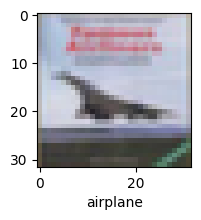

In [83]:
plot_sample(X_test, Y_test,3)

In [84]:
classes[Y_classes[3]]

'airplane'